<a href="https://colab.research.google.com/github/maing-rv/python_cw/blob/main/python_cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google doc - report + references:
https://docs.google.com/document/d/1sOuEaIPvdHxhAXZPNPEwqhgPJhfEIN3VK7it6kPEZmk/edit

Problem statement and hypothesis: **Predicting popularity** vs. Genre classification.


###Loading and viewing the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
# How to load files: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
from google.colab import files
uploaded = files.upload()

Saving data_by_artist.csv to data_by_artist.csv
Saving data_by_genres.csv to data_by_genres.csv
Saving data_by_year.csv to data_by_year.csv
Saving data_w_genres.csv to data_w_genres.csv
Saving data.csv to data.csv


In [ ]:
# Data w/ genres:
#spotify_data_w_genres = pd.read_csv('data_w_genres.csv')
#spotify_data_w_genres.head()

In [ ]:
# Data by year:
spotify_data_by_year = pd.read_csv('data_by_year.csv')
spotify_data_by_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


In [ ]:
#dataframe.loc[dataframe['popularity'] < X, 'popularity'] = 0 
#dataframe.loc[dataframe['popularity'] >= X, 'popularity'] = 1
#dataframe.loc[dataframe['popularity'] == 1]
#popular_below_50 = dataframe[dataframe.popularity < 50]

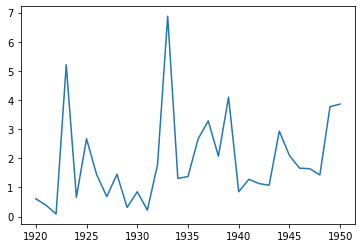

In [ ]:
# Popularity by year, 1920 to 1950:
plt.plot(spotify_data_by_year.year[:31], spotify_data_by_year.popularity[:31])
plt.show()

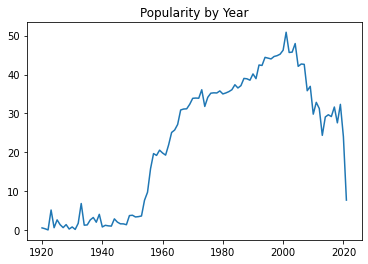

In [ ]:
# Popularity by year, 1920 to 2020:
plt.plot(spotify_data_by_year.year, spotify_data_by_year.popularity)
plt.title("Popularity by Year")
plt.show()

In [2]:
data = pd.read_csv('data.csv')
#data.shape

# Data.csv

In [3]:
# Data w/ popularity:
spotify_data = pd.read_csv('data.csv')
spotify_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [4]:
spotify_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


**Column descriptions:**  
Acousticness - The relative metric of the track being acoustic.  
Danceability - The relative measurement of the track being danceable.  
Duration_ms - The length of the track in milliseconds (ms).  
Energy - The energy of the track.   
Explicit - The binary value whether the track contains explicit content or not.  
Instrumentalness - The relative ratio of the track being instrumental.    
Key - 0-11 - The primary key of the track encoded as integers in between 0 and 11.  
Liveness - The relative duration of the track sounding as a live performance.  
Loudness - Relative loudness of the track in the typical range [-60, 0] in decibel (dB).  
Mode - The binary value representing whether the track starts with a major (1) chord progression or not (0).    
Speechiness - The relative length of the track containing any kind of human voice.  
Tempo - The tempo of the track in Beat Per Minute (BPM).   
Valence -  The positiveness of the track.   
Year - The release year of track.

Popularity - The popularity of the song lately, default country = US.

**Columns to drop:**    
1) artists - The list of artists credited for production of the track.   
2) id - The primary identifier for the track, generated by Spotify.    
3) release_date - The date of release of the track in yyyy-mm-dd, yyyy-mm, or even yyyy format.    
4) name - The title of the track.    




In [ ]:
#spotify_data_20_50 = spotify_data[spotify_data.year <= 1950]
#spotify_data_20_50.shape

In [ ]:
#spotify_data_50_90 = spotify_data[(spotify_data.year > 1950) & (spotify_data.year <= 1990)]
#spotify_data_50_90.shape

In [ ]:
#spotify_data_90_20 = spotify_data[spotify_data.year > 1990]
#spotify_data_90_20.shape

### Preproccessing Dataset


In [ ]:
# No null values:
spotify_data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [21]:
# Check for duplicates - based on all columns:
spotify_data.duplicated().sum()

2159

In [5]:
# Drop duplicates:
spotify_data = spotify_data.drop_duplicates(keep='first')
spotify_data.duplicated().sum()

0

In [27]:
# Check for duplicates - based on name + artists - may have different id:
#spotify_data[spotify_data.duplicated(subset=['name','artists'])]
spotify_data.duplicated(subset=['name','artists']).sum()

12789

In [6]:
# Drop duplicates:
spotify_data = spotify_data.drop_duplicates(subset=['name','artists'],keep='first')
spotify_data.duplicated(subset=['name','artists']).sum()

0

In [30]:
spotify_data.shape

(159441, 19)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

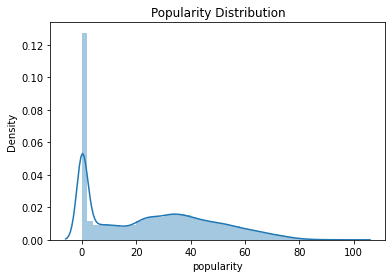

In [7]:
# Popularity distribution:
sns.distplot(spotify_data['popularity']).set_title('Popularity Distribution')

In [8]:
# Tracks w/ popularity score of 0:
spotify_data[spotify_data.popularity == 0]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7,0.99600,['Mamie Smith & Her Jazz Hounds'],0.474,186173,0.2390,0,02FzJbHtqElixxCmrpSCUa,0.186,9,0.1950,-9.712,1,Arkansas Blues,0,1920,0.0289,78.784,0.3660,1920
8,0.99600,['Francisco Canaro'],0.469,146840,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.960,8,0.1490,-18.717,1,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.6210,1920
9,0.00682,['Meetya'],0.571,476304,0.7530,0,06NUxS2XL3efRh0bloxkHm,0.873,8,0.0920,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920
10,0.95200,['Dorville'],0.688,150067,0.2200,0,07jrRR1CUUoPb1FLfSy9Jh,0.000,6,0.2620,-15.208,0,Oouin,0,1920,0.8450,82.024,0.4140,1920
11,0.99600,['Francisco Canaro'],0.579,167213,0.3560,0,0ANuF7SvPeIHanGcCpy9jR,0.948,10,0.1740,-14.574,1,Desengaño - Remasterizado,0,1920-07-08,0.0394,131.494,0.7030,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174365,0.97600,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.358,381150,0.1210,0,0sZ6HFSulsrOl6VTBwp6jd,0.889,2,0.1350,-25.111,1,I giorni,0,2021-01-23,0.0532,131.808,0.1060,2021
174369,0.99500,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.297,349200,0.0287,0,2LeqqwzobL5ktfQhWA3bHh,0.908,8,0.0995,-30.008,1,Nuvole bianche,0,2021-01-23,0.0564,141.636,0.0678,2021
174371,0.99500,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.343,206700,0.0165,0,3Glmyv3hbGGTgeR3FZrxJA,0.878,9,0.0774,-30.915,0,Una Mattina,0,2021-01-23,0.0455,126.970,0.1510,2021
174375,0.98800,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.316,303333,0.0573,0,6QGVWUbmlePAiY5zJjfCmT,0.879,3,0.1200,-24.121,1,Night,0,2021-01-23,0.0515,81.070,0.0373,2021


In [9]:
# Drop tracks w/ popularity == 0:
spotify_data.drop(spotify_data[spotify_data.popularity == 0].index, inplace=True)
spotify_data[spotify_data.popularity == 0]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

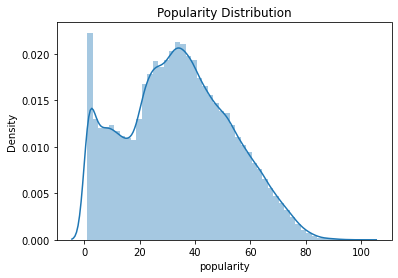

In [12]:
# After:
sns.distplot(spotify_data['popularity']).set_title('Popularity Distribution')

In [ ]:
spotify_data['popularity'].describe()

count    132501.000000
mean         33.699519
std          18.961971
min           1.000000
25%          20.000000
50%          33.000000
75%          47.000000
max         100.000000
Name: popularity, dtype: float64

In [66]:
# Drop 4 non-metric columns:
spotify_data = spotify_data.drop(['id', 'artists', 'name', 'release_date'], axis=1)

In [52]:
print(spotify_data.shape)

(120638, 21)


# Correlation heat-map

In [13]:
corr = spotify_data.corr()
corr

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.238069,-0.079858,-0.753267,-0.210127,0.207847,-0.034679,-0.052447,-0.579688,0.068600,-0.367472,-0.046900,-0.200038,-0.215731,-0.528767
danceability,-0.238069,1.000000,-0.091475,0.200451,0.201286,-0.242301,0.031413,-0.119080,0.267582,-0.050164,0.183517,0.191634,-0.042720,0.548977,0.164362
duration_ms,-0.079858,-0.091475,1.000000,0.026346,0.002301,0.069956,-0.001957,0.052638,-0.013009,-0.058872,0.044866,-0.033537,-0.018535,-0.158562,0.049962
energy,-0.753267,0.200451,0.026346,1.000000,0.166569,-0.182203,0.034610,0.164130,0.777414,-0.056975,0.276201,0.033054,0.244296,0.368443,0.451447
explicit,-0.210127,0.201286,0.002301,0.166569,1.000000,-0.104500,0.012374,0.022039,0.199116,-0.073767,0.269334,0.257726,0.008142,-0.025626,0.288072
instrumentalness,0.207847,-0.242301,0.069956,-0.182203,-0.104500,1.000000,-0.020192,-0.030455,-0.363643,-0.049083,-0.232715,-0.099313,-0.064441,-0.219202,-0.095337
key,-0.034679,0.031413,-0.001957,0.034610,0.012374,-0.020192,1.000000,-0.006021,0.018935,-0.121237,0.005010,0.052258,0.006962,0.027376,0.013118
liveness,-0.052447,-0.119080,0.052638,0.164130,0.022039,-0.030455,-0.006021,1.000000,0.076375,0.003958,-0.097402,0.156276,0.019100,-0.015947,0.013025
loudness,-0.579688,0.267582,-0.013009,0.777414,0.199116,-0.363643,0.018935,0.076375,1.000000,-0.015744,0.323520,-0.048430,0.197554,0.314129,0.416047
mode,0.068600,-0.050164,-0.058872,-0.056975,-0.073767,-0.049083,-0.121237,0.003958,-0.015744,1.000000,-0.025702,-0.067533,0.005360,0.019646,-0.052527


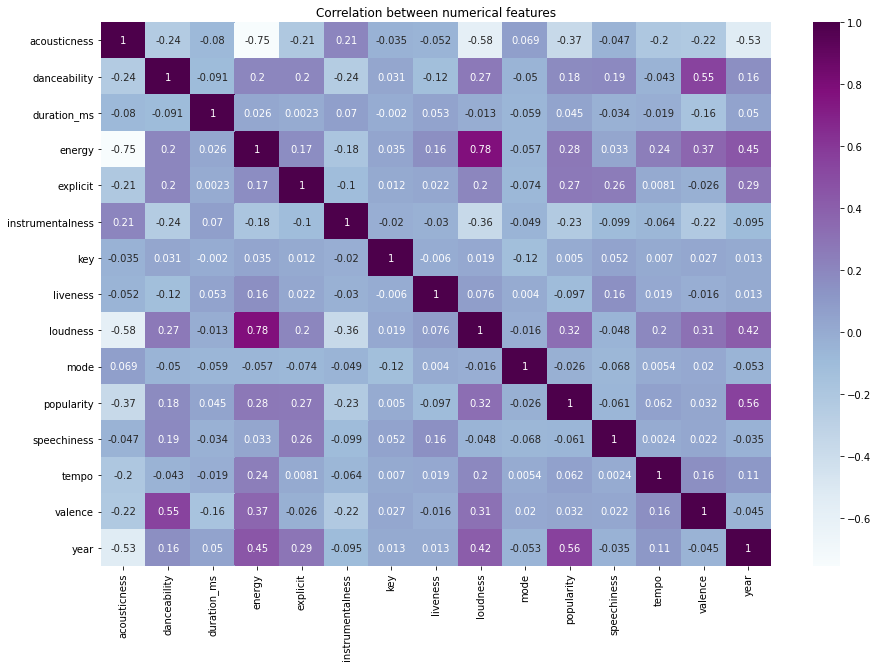

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap='BuPu') #BrBG_r
plt.title('Correlation between numerical features')
plt.show()

In [15]:
series = np.abs(corr['popularity']).sort_values(ascending=False)
print(series)

popularity          1.000000
year                0.558056
acousticness        0.367472
loudness            0.323520
energy              0.276201
explicit            0.269334
instrumentalness    0.232715
danceability        0.183517
liveness            0.097402
tempo               0.061529
speechiness         0.060751
duration_ms         0.044866
valence             0.032047
mode                0.025702
key                 0.005010
Name: popularity, dtype: float64


# Data exploration


This section will be exploring the overall trends found in the dataset, to see how the variables correlate with each other.
There 10 numerical variables and 3 categorial ones - explicit, key, mode.

In [ ]:
# Pair-plot for features:
#sns.pairplot(spotify_data)

## Acousticness

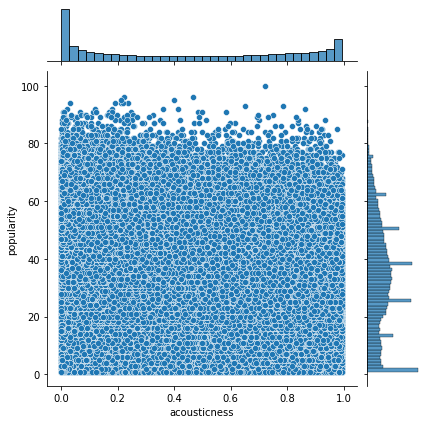

In [16]:
# Acousticness:
sns.jointplot(x = 'acousticness', y = 'popularity', data = spotify_data)
#plt.title('Acousticness and Popularity')

In [ ]:
#sns.violinplot(x = 'key', y = 'popularity', data = spotify_data)

## Instrumentalness - split into a binary feature

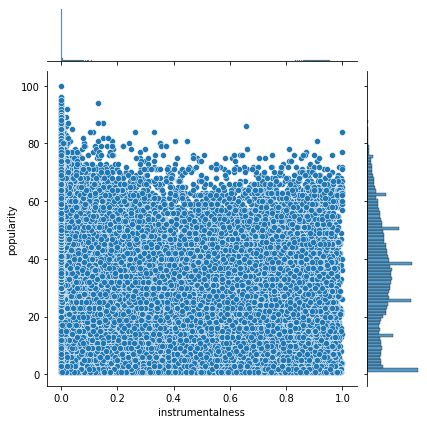

In [17]:
# Instrumentalness:
sns.jointplot(x = 'instrumentalness', y = 'popularity', data = spotify_data)

(array([93673.,  3403.,  2255.,  1811.,  1695.,  1768.,  2036.,  3020.,
         6470.,  6119.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

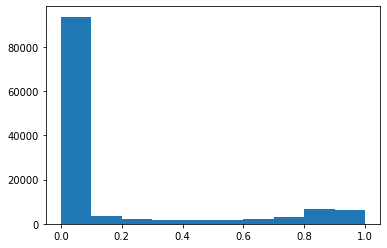

In [18]:
plt.hist(spotify_data.instrumentalness)

In [ ]:
#data['instrumentalness'].describe()

In [ ]:
#data[data['instrumentalness'] == 0.5]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


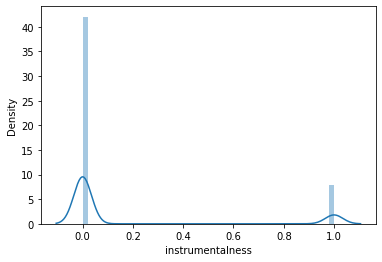

In [19]:
# Split into binary feature:
spotify_data['instrumentalness'] = list(map((lambda x: 0 if x <= 0.5 else 1), spotify_data.instrumentalness))
#spotify_data[spotify_data.instrumentalness == 1]
sns.distplot(spotify_data.instrumentalness)

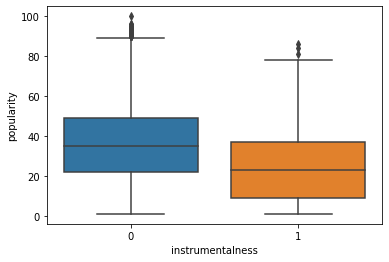

In [20]:
sns.boxplot(x = 'instrumentalness', y = 'popularity', data = spotify_data)

## Energy

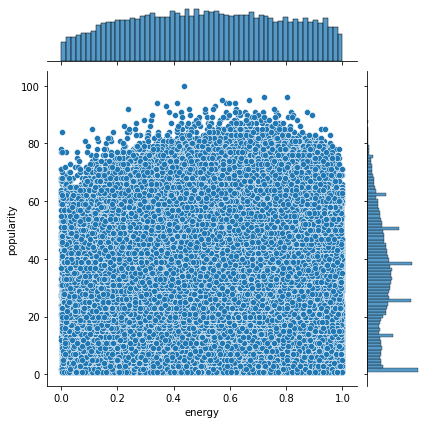

In [21]:
# Energy:
sns.jointplot(x = 'energy', y = 'popularity', data = spotify_data)

## Loudness - skewed left, negative values

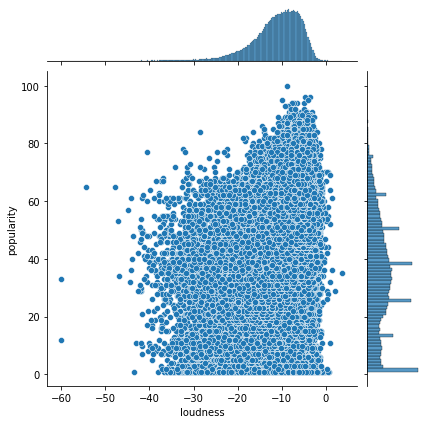

In [22]:
# Loudness:
sns.jointplot(x = 'loudness', y = 'popularity', data = spotify_data)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


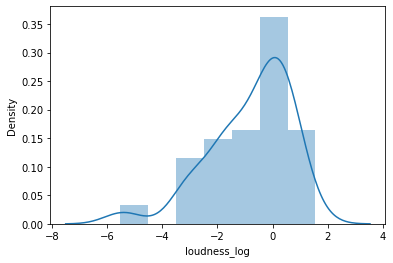

In [ ]:
#spotify_data['loudness_log'] = np.log1p(spotify_data['loudness'])
#sns.distplot(spotify_data.loudness_log)

In [ ]:
#spotify_data['loudness_log']

## Duration - log transformed

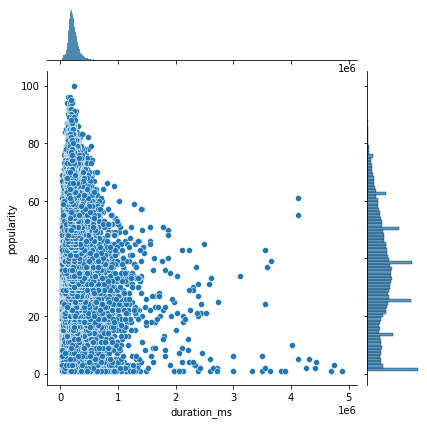

In [23]:
# Duration:
sns.jointplot(x = 'duration_ms', y = 'popularity', data = spotify_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


8.780584850601539 -0.12005902202713316


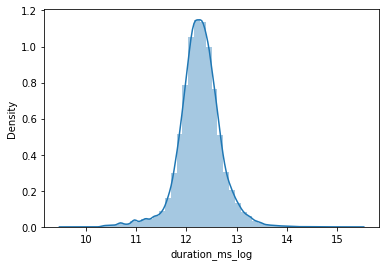

In [24]:
# Log transform:
spotify_data['duration_ms_log'] = np.log1p(spotify_data['duration_ms'])
sns.distplot(spotify_data['duration_ms_log'])

In [25]:
print(spotify_data['duration_ms'].skew(), spotify_data['duration_ms_log'].skew())

8.780584850601539 -0.12005902202713316


## Liveness - skewed right

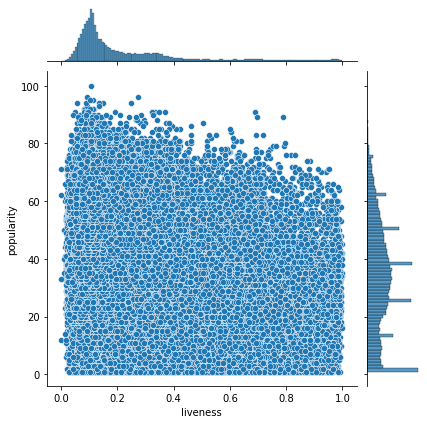

In [26]:
# Liveness:
sns.jointplot(x = 'liveness', y = 'popularity', data = spotify_data)

In [ ]:
#spotify_data['liveness_log'] = np.log1p(spotify_data['liveness'])
#sns.distplot(spotify_data.liveness_log)

##Speechiness - tracks above 0.66 dropped (audiobooks/podcasts) + log transformed

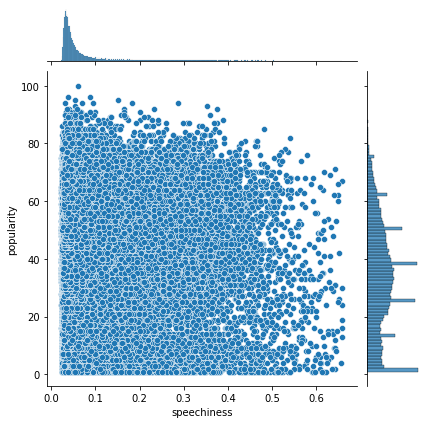

In [32]:
# Speechiness:
sns.jointplot(x = 'speechiness', y = 'popularity', data = spotify_data)

(array([1.02622e+05, 1.02120e+04, 4.04600e+03, 2.31500e+03, 9.89000e+02,
        3.46000e+02, 1.33000e+02, 6.40000e+01, 1.24000e+02, 1.39900e+03]),
 array([0.    , 0.0971, 0.1942, 0.2913, 0.3884, 0.4855, 0.5826, 0.6797,
        0.7768, 0.8739, 0.971 ]),
 <a list of 10 Patch objects>)

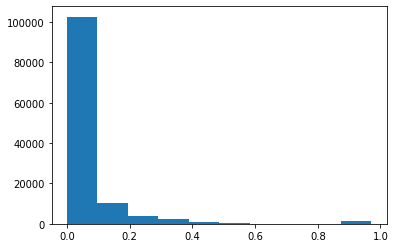

In [28]:
plt.hist(spotify_data.speechiness)

In [29]:
# Outliers at 0: 
spotify_data['speechiness'] = spotify_data['speechiness'].replace(0, spotify_data['speechiness'].mean())
#spotify_data[spotify_data.speechiness == 0]
#data[data.speechiness == 0] - valence, danceability, speechiness, tempo - missing values at 0.

In [ ]:
#spotify_data['speechiness'] = list(map((lambda x: 0 if x < 0.66 else 1), spotify_data.speechiness))
#spotify_data[spotify_data.speechiness == 1]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


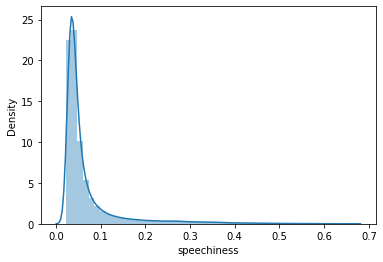

In [30]:
# Drop tracks w/ speechiness > 0.66 - audiobooks and podcasts:
spotify_data.drop(spotify_data[spotify_data.speechiness > 0.66].index, inplace=True)
sns.distplot(spotify_data.speechiness)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


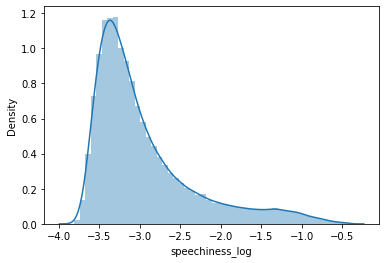

In [31]:
# Log transform:
spotify_data['speechiness_log'] = np.log(spotify_data['speechiness'])
sns.distplot(spotify_data.speechiness_log)

## Tempo - outliers at 0 replaced w/ mean

In [33]:
#spotify_data.drop(spotify_data[spotify_data.tempo == 0].index, inplace=True)
#df['column name'] = df['column name'].replace(['old value'],'new value')
spotify_data['tempo'] = spotify_data['tempo'].replace(0, spotify_data['tempo'].mean())
spotify_data[spotify_data['tempo'] == 0]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_ms_log,speechiness_log


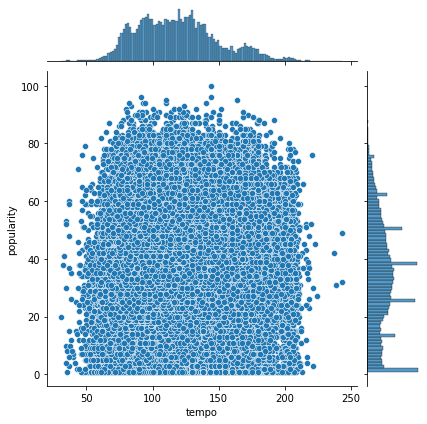

In [34]:
# Tempo:
sns.jointplot(x = 'tempo', y = 'popularity', data = spotify_data)

## Valence - outliers at 0 replaced with mean

In [35]:
spotify_data['valence'] = spotify_data['valence'].replace(0, spotify_data['valence'].mean())
spotify_data[spotify_data['valence'] == 0]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_ms_log,speechiness_log


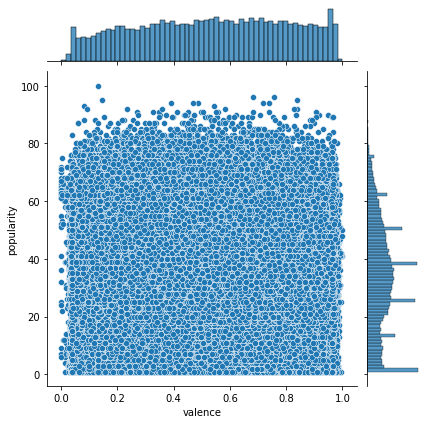

In [36]:
# Valence
sns.jointplot(x = 'valence', y = 'popularity', data = spotify_data) 

## Danceability - outliers at 0 replaced with mean


In [37]:
#spotify_data.drop(spotify_data[spotify_data.danceability == 0].index, inplace=True)
spotify_data['danceability'] = spotify_data['danceability'].replace(0, spotify_data['danceability'].mean())
spotify_data[spotify_data['danceability'] == 0]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_ms_log,speechiness_log


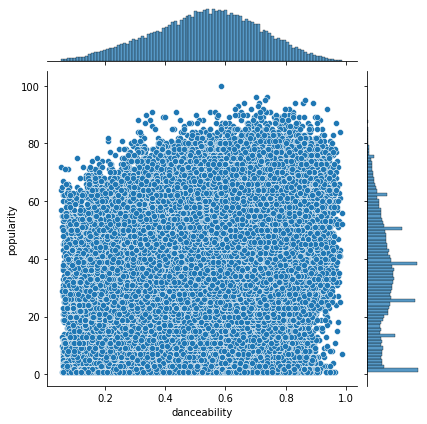

In [38]:
# Danceability:
sns.jointplot(x = 'danceability', y = 'popularity', data = spotify_data)

## Year

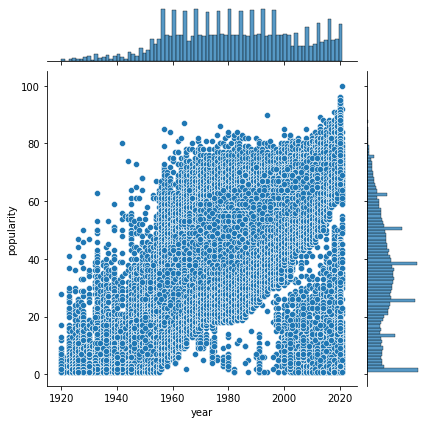

In [39]:
# Year
sns.jointplot(x = 'year', y = 'popularity', data = spotify_data)

## Key

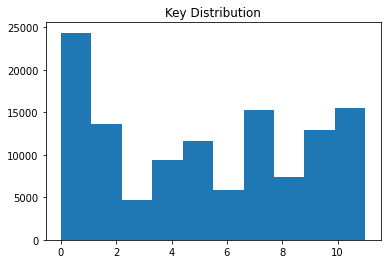

In [40]:
# Key:
#sns.distplot(spotify_data['key']).set_title('Key Distribution')
plt.hist(spotify_data['key'])
plt.title('Key Distribution')
plt.show()

Text(0.5, 1.0, 'Popularity Based on Key')

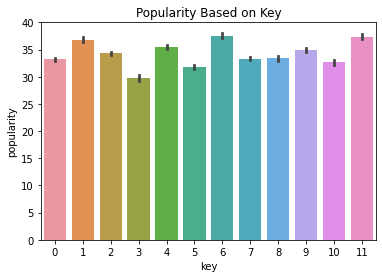

In [41]:
sns.barplot(x = 'key', y = 'popularity', data = spotify_data)
plt.title('Popularity Based on Key')

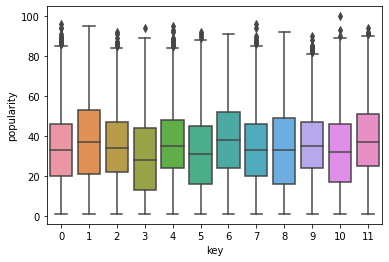

In [42]:
sns.boxplot(x = 'key', y = 'popularity', data = spotify_data)

## Mode

Text(0.5, 1.0, 'Popularity Based on Mode')

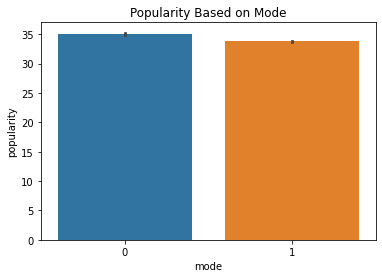

In [43]:
#Mode:
sns.barplot(x = 'mode', y = 'popularity', data = spotify_data)
plt.title('Popularity Based on Mode')

## Explicit

Text(0.5, 1.0, 'Popularity Based on Explicit Content')

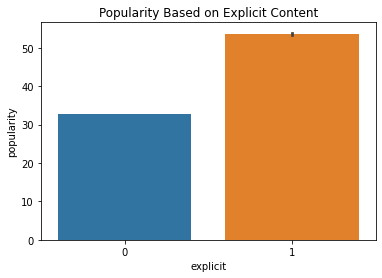

In [44]:
# Explicit:
sns.barplot(x = 'explicit', y = 'popularity', data = spotify_data)
plt.title('Popularity Based on Explicit Content')

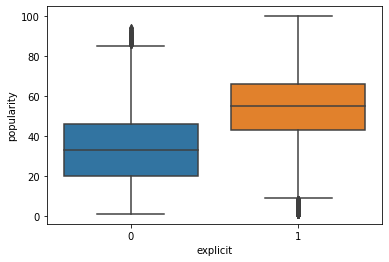

In [45]:
sns.boxplot(x = 'explicit', y = 'popularity', data = spotify_data)

# Log transformation - heat-map

In [46]:
corr = spotify_data.corr()
#corr

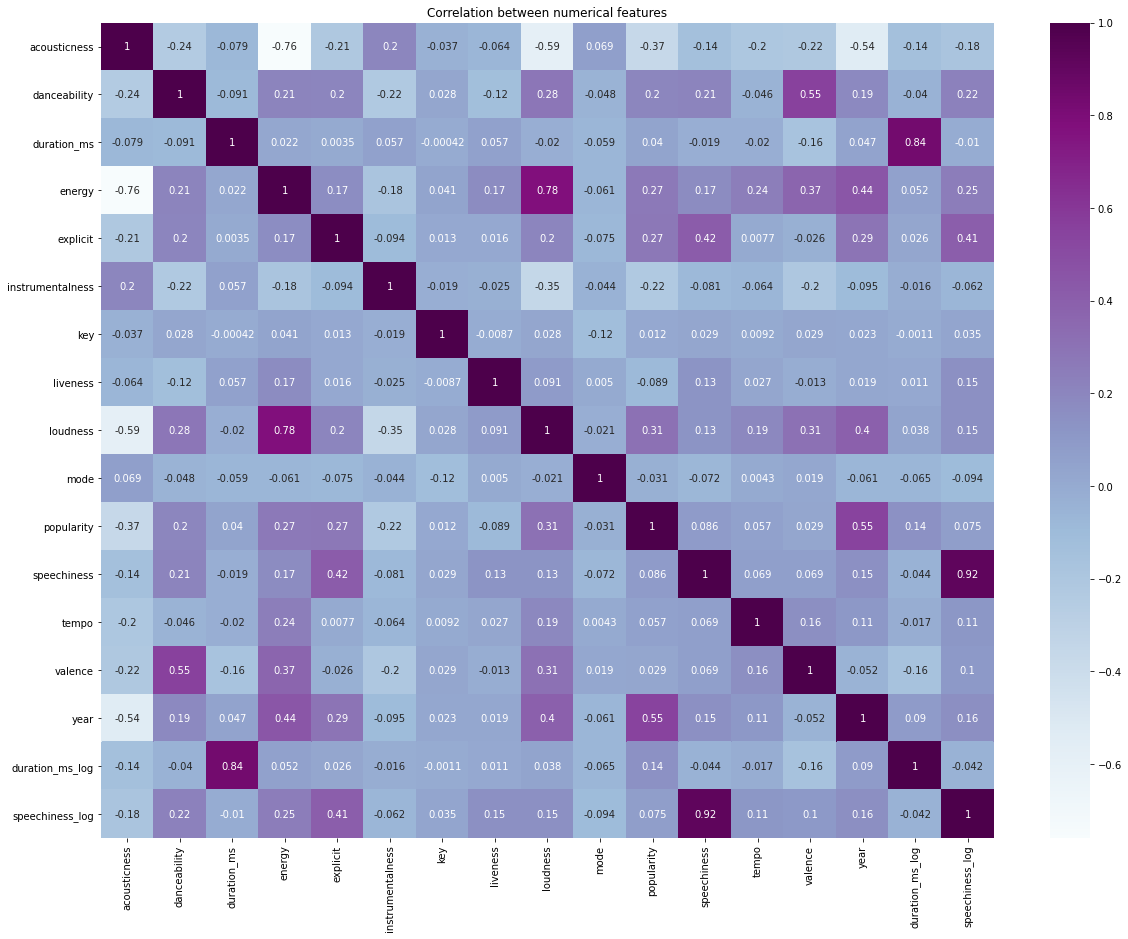

In [47]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot = True, cmap='BuPu') #BrBG_r
plt.title('Correlation between numerical features')
plt.show()

In [53]:
# Threshold at 0.80 - columns to drop:
spotify_data = spotify_data.drop(['duration_ms', 'speechiness'], axis=1)

In [50]:
spotify_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration_ms_log,speechiness_log
count,120638.000000,120638.000000,1.206380e+05,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000,120638.000000
mean,0.444707,0.534994,2.332147e+05,0.519182,0.066082,0.160687,5.182322,0.207594,-11.035315,0.711749,34.136963,0.069198,118.626408,0.532226,1982.266583,12.269164,-2.945772
std,0.361169,0.173601,1.267443e+05,0.266428,0.248426,0.367244,3.507835,0.182672,5.336359,0.452950,18.920870,0.073998,29.917659,0.264839,21.567089,0.417653,0.635435
min,0.000000,0.055100,1.470800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,1.000000,0.022200,30.946000,0.000010,1920.000000,9.596215,-3.807663
25%,0.068200,0.417000,1.702400e+05,0.303000,0.000000,0.000000,2.000000,0.096200,-13.828000,0.000000,21.000000,0.033900,95.534250,0.317000,1965.000000,12.044970,-3.384340
50%,0.410000,0.544000,2.128270e+05,0.521000,0.000000,0.000000,5.000000,0.133000,-10.208000,1.000000,34.000000,0.042700,116.742500,0.541000,1982.000000,12.268240,-3.153556
75%,0.806000,0.660000,2.683730e+05,0.739000,0.000000,0.000000,8.000000,0.263000,-7.119000,1.000000,48.000000,0.065500,136.836000,0.755000,1998.000000,12.500137,-2.725705
max,0.996000,0.988000,4.892761e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.660000,243.507000,1.000000,2021.000000,15.403268,-0.415515


In [55]:
spotify_data.shape

(120638, 19)

In [62]:
corr = spotify_data.corr()
np.abs(corr['popularity']).sort_values(ascending=False)

popularity          1.000000
year                0.548948
acousticness        0.367549
loudness            0.307534
explicit            0.273300
energy              0.265893
instrumentalness    0.221811
danceability        0.200648
duration_ms_log     0.141955
liveness            0.088831
speechiness_log     0.074932
tempo               0.057125
mode                0.030649
valence             0.028868
key                 0.012190
Name: popularity, dtype: float64

# Feature extraction


In [ ]:
# Popularity threshold for classification:
#spotify_data.loc[spotify_data['popularity'] < X, 'is_popular'] = 0 
#spotify_data.loc[spotify_data['popularity'] >= X, 'is_popular'] = 1
#spotify_data.loc[spotify_data['popularity'] == 1]

In [67]:
# Extract features:
X = spotify_data.drop(['popularity'],axis=1)
print(X)
y = spotify_data.popularity
print(y)

        acousticness  danceability  ...  duration_ms_log  speechiness_log
0           0.991000         0.598  ...        12.033705        -2.368725
1           0.643000         0.852  ...        11.919730        -2.929945
2           0.993000         0.647  ...        12.006572        -1.748700
3           0.000173         0.730  ...        12.952969        -3.158251
4           0.295000         0.704  ...        12.015063        -2.566551
...              ...           ...  ...              ...              ...
174347      0.325000         0.336  ...        12.012087        -3.146555
174349      0.125000         0.755  ...        12.173322        -2.933697
174351      0.009840         0.530  ...        12.444463        -3.349554
174353      0.715000         0.734  ...        10.676393        -1.035637
174361      0.105000         0.781  ...        12.059433        -1.789761

[120638 rows x 14 columns]
0         12
1          7
2          4
3         17
4          2
          ..
174347

In [68]:
# Split the data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
print(X.columns)

# Normalisation

We need to unskew the data, e.g. log transformation, and then normalise it, e.g. MinMaxScaler - before running the feature selection algorithm.   

https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ['loudness', 'tempo', 'year', 'duration_ms_log', 'speechiness_log']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [70]:
X_train.describe()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,tempo,valence,year,duration_ms_log,speechiness_log
count,96510.000000,96510.000000,96510.000000,96510.000000,96510.000000,96510.000000,96510.000000,96510.000000,96510.000000,96510.000000,96510.000000,96510.000000,96510.000000,96510.000000
mean,0.445118,0.534846,0.519048,0.066045,0.160388,5.188260,0.207400,0.768052,0.711833,0.412689,0.531855,0.616452,0.460318,0.254162
std,0.361458,0.173849,0.266632,0.248362,0.366967,3.509206,0.182695,0.083940,0.452912,0.140977,0.265161,0.213688,0.071743,0.187319
min,0.000000,0.055100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000
25%,0.068300,0.417000,0.303000,0.000000,0.000000,2.000000,0.096200,0.724339,0.000000,0.303919,0.316000,0.445545,0.421916,0.124795
50%,0.410500,0.544000,0.521000,0.000000,0.000000,5.000000,0.133000,0.781187,1.000000,0.403482,0.541000,0.613861,0.460240,0.192830
75%,0.806000,0.660000,0.739000,0.000000,0.000000,8.000000,0.263000,0.829647,1.000000,0.498576,0.755000,0.772277,0.499811,0.318509
max,0.996000,0.988000,1.000000,1.000000,1.000000,11.000000,0.997000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


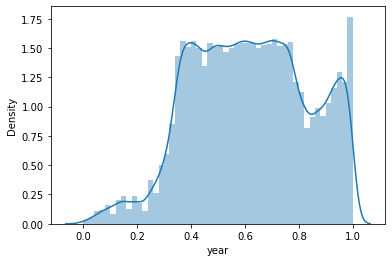

In [60]:
sns.distplot(X_train['year'])

# Feature selection


In [71]:
# select k best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# apply k-best algorithm
kbest = SelectKBest(score_func = chi2, k = 'all')
ordered_features = kbest.fit(X_train,y_train)

In [72]:
df_scores = pd.DataFrame(ordered_features.scores_, columns=['Score'])

In [73]:
df_columns = pd.DataFrame(X_train.columns, columns = ['Feature_name'])

In [74]:
feature_rank = pd.concat([df_scores,df_columns],axis=1)

In [75]:
feature_rank.nlargest(14,'Score')

,Score,Feature_name
3,9445.651868,explicit
4,4493.130680,instrumentalness
0,4364.190723,acousticness
11,2312.691906,year
2,1062.919097,energy
13,273.570817,speechiness_log
1,253.615003,danceability
5,242.660386,key
6,143.564227,liveness
10,110.567338,valence


****

In [76]:
# feature importance with decision trees
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

In [ ]:
model.feature_importances_

In [ ]:
ranked_features = pd.Series(model.feature_importances_, index = X_train.columns)

In [ ]:
ranked_features.nlargest(14).plot(kind='bar')

# Model training
